In [77]:
import community
import pandas as pd
import subprocess
import networkx
import numpy as np
from sklearn import manifold
from matplotlib import pyplot as plt
import seaborn as sns
%cd ~/yeah2/

/Users/thiberio/yeah2


In [7]:
subprocess.call([
    'iqtree',
    '-s', '2689.aln',
    '-te', 'BIONJ',
    '-m', 'LG+G',
    '-safe',
    '-keep-ident',
    '-redo'
])
%ls

2689.aln           2689.aln.ckp.gz    2689.aln.log       2689.aln.treefile
2689.aln.bionj     2689.aln.iqtree    2689.aln.mldist


In [14]:
indexes = []
values  = []
for line in open('2689.aln.mldist').readlines()[1:]:
    line = line.split()
    indexes.append(line[0])
    values.append(line[1:])

In [68]:
df = pd.DataFrame(index=indexes,
                  columns=indexes, 
                  data=values, 
                  dtype=float)
sim_df = df.max().max() - df
np.fill_diagonal(sim_df.values, 0)
sim_df.head()

,AAP99480.1_GCA_000007925.1,AII47128.1_GCA_000737575.1,AIQ96614.1_GCA_000757865.1,AFY30282.1_GCA_000316515.1,PSB38289.1_GCA_003003925.1,BAB77820.1_GCA_000009705.1,AFZ57098.1_GCA_000317695.1,BAU05571.1_GCA_001548455.1,OBQ01871.1_GCA_001672225.1,AFY53708.1_GCA_000316665.1,...,PSB67037.1_GCA_003003915.1,BAD80020.1_GCA_000010065.1,EKV01840.1_GCA_000316115.1,APB34923.1_GCA_001870225.1,ABD03247.1_GCA_000013225.1,EFJ47259.1_GCA_000143455.1,XP_006844190.1_GCF_000471905.2,XP_020522797.1_GCF_000471905.2,XP_020522798.1_GCF_000471905.2,XP_011623282.1_GCF_000471905.2
AAP99480.1_GCA_000007925.1,0.000000,6.011405,5.991475,5.649684,5.663832,4.046559,4.223467,4.080109,4.134615,4.033707,...,3.727787,4.029547,3.205959,4.065983,4.162098,1.450611,1.828092,2.149446,2.149446,1.435621
AII47128.1_GCA_000737575.1,6.011405,0.000000,6.073829,5.895936,5.881996,4.401680,4.288344,4.445104,4.559332,4.259787,...,4.414867,4.806253,3.771224,4.448671,4.336065,2.564920,2.773505,3.174003,3.174003,2.615690
AIQ96614.1_GCA_000757865.1,5.991475,6.073829,0.000000,5.703170,5.716814,3.765817,3.903521,3.822337,4.010673,3.955778,...,3.805176,4.058191,3.293591,4.143118,4.080767,1.001860,2.297713,2.664869,2.664869,2.140496
AFY30282.1_GCA_000316515.1,5.649684,5.895936,5.703170,0.000000,6.646603,4.196409,4.155660,4.165326,4.025646,4.052057,...,4.283671,4.708159,3.904302,4.258833,3.894508,2.537858,2.067922,2.461351,2.461351,1.778575
PSB38289.1_GCA_003003925.1,5.663832,5.881996,5.716814,6.646603,0.000000,4.182650,4.141953,4.151358,4.011282,4.037542,...,4.270268,4.696538,3.889132,4.267234,3.915085,2.515639,2.066556,2.458732,2.458732,1.777413


In [31]:
g = networkx.Graph()

In [33]:
print(g.nodes())

[]


In [43]:
g.add_edge('a', 'b', weight=9999999999)
g.nodes()

NodeView(('a', 'b'))

In [41]:
g['a']

AtlasView({'b': {'weight': 9999999999}})

In [69]:
graph = networkx.convert_matrix.from_pandas_adjacency(sim_df)
graph['AAP99480.1_GCA_000007925.1']

AtlasView({'AII47128.1_GCA_000737575.1': {'weight': 6.011405}, 'AIQ96614.1_GCA_000757865.1': {'weight': 5.9914755}, 'AFY30282.1_GCA_000316515.1': {'weight': 5.6496844}, 'PSB38289.1_GCA_003003925.1': {'weight': 5.663832}, 'BAB77820.1_GCA_000009705.1': {'weight': 4.046559}, 'AFZ57098.1_GCA_000317695.1': {'weight': 4.2234666}, 'BAU05571.1_GCA_001548455.1': {'weight': 4.080108600000001}, 'OBQ01871.1_GCA_001672225.1': {'weight': 4.1346151}, 'AFY53708.1_GCA_000316665.1': {'weight': 4.0337069}, 'PSB28630.1_GCA_003003885.1': {'weight': 3.8538157}, 'ABG50836.1_GCA_000014265.1': {'weight': 4.0798972000000004}, 'AOX03174.1_GCA_001767235.1': {'weight': 4.1495291000000005}, 'EDX74569.1_GCA_000155555.1': {'weight': 3.8638012}, 'AFY96223.1_GCA_000317145.1': {'weight': 4.2330875}, 'PSB58467.1_GCA_003003845.1': {'weight': 3.5066667000000002}, 'PSF35307.1_GCA_003007785.1': {'weight': 4.0423635}, 'AFZ34241.1_GCA_000317575.1': {'weight': 4.0360531}, 'AFY79427.1_GCA_000317025.1': {'weight': 3.9798577}, 'AF

In [104]:
clusters = community.best_partition(graph, resolution=0.99)
clusters

{'AAP99480.1_GCA_000007925.1': 0,
 'AII47128.1_GCA_000737575.1': 0,
 'AIQ96614.1_GCA_000757865.1': 0,
 'AFY30282.1_GCA_000316515.1': 0,
 'PSB38289.1_GCA_003003925.1': 0,
 'BAB77820.1_GCA_000009705.1': 1,
 'AFZ57098.1_GCA_000317695.1': 1,
 'BAU05571.1_GCA_001548455.1': 1,
 'OBQ01871.1_GCA_001672225.1': 1,
 'AFY53708.1_GCA_000316665.1': 1,
 'PSB28630.1_GCA_003003885.1': 1,
 'ABG50836.1_GCA_000014265.1': 1,
 'AOX03174.1_GCA_001767235.1': 1,
 'EDX74569.1_GCA_000155555.1': 1,
 'AFY96223.1_GCA_000317145.1': 2,
 'PSB58467.1_GCA_003003845.1': 1,
 'PSF35307.1_GCA_003007785.1': 1,
 'AFZ34241.1_GCA_000317575.1': 1,
 'AFY79427.1_GCA_000317025.1': 1,
 'AFY88431.1_GCA_000317125.1': 1,
 'PSB62979.1_GCA_003003835.1': 1,
 'PSB49049.1_GCA_003004015.1': 1,
 'PSM48670.1_GCA_003015105.1': 1,
 'ADN15591.1_GCA_000147335.1': 1,
 'PSB28906.1_GCA_003003715.1': 1,
 'PSB41195.1_GCA_003003725.1': 1,
 'PSB25865.1_GCA_003003795.1': 1,
 'BAI89510.1_GCA_000210375.1': 1,
 'AMW27832.1_GCA_001611905.1': 1,
 'BAY56124.1_G

In [93]:
mds        = manifold.MDS(n_components=2,
                          dissimilarity="precomputed",
                          random_state=6)
mds_result = mds.fit( df )
coords     = mds_result.embedding_
x, y       = coords[:, 0], coords[:, 1]
coords

array([[-2.31788954,  0.79686324],
       [-1.3565381 ,  1.07440184],
       [-2.06256056,  1.21182524],
       [-1.74953539,  0.90684841],
       [-1.79878319,  0.85814882],
       [ 0.01158404, -0.97310771],
       [-0.06580917, -0.95576369],
       [-0.02858507, -0.69481596],
       [-0.08483151, -0.71738143],
       [ 0.1629662 , -0.91782208],
       [-0.1088103 , -0.87983509],
       [ 0.04848727, -0.3698321 ],
       [-0.56334884, -0.97771787],
       [-0.39715421, -0.81751437],
       [ 0.11940507, -0.07766776],
       [ 0.22772436,  0.13120537],
       [ 0.06872382, -0.15097319],
       [-0.41664125, -0.54403422],
       [-0.53292481, -0.45829069],
       [ 0.22794308, -0.68917147],
       [ 0.22794321, -0.68917138],
       [ 0.22794301, -0.68917129],
       [ 0.22794314, -0.68917119],
       [-0.44284952, -1.01764611],
       [-0.21870593, -0.09240138],
       [-0.22068871, -0.09213222],
       [-0.65375242, -0.73281839],
       [-0.14489059, -0.34137565],
       [-0.14489117,

In [105]:
cluster_colors = {}
for node, x_val, y_val in zip(indexes, x, y):
    node_cluster = clusters[node]
    if not node_cluster in cluster_colors:
        cluster_colors[node_cluster] = {'x':[], 'y':[]}
    cluster_colors[node_cluster]['x'].append(x_val)
    cluster_colors[node_cluster]['y'].append(y_val)

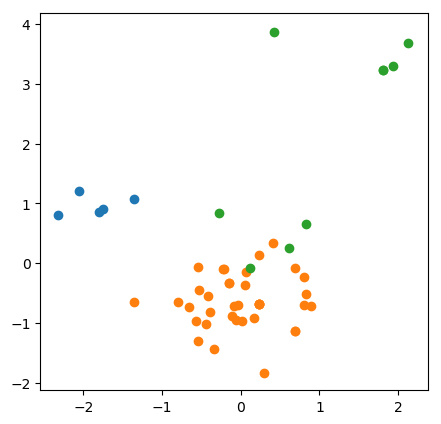

In [107]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
for cluster_num, xy in cluster_colors.items():
    ax.scatter(xy['x'], xy['y'])